In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [122]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [46]:
df=pd.read_csv('wine.csv')

In [47]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# EDA and Visualization

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [49]:
df.isna().any()

Type               False
Alcohol            False
Malic              False
Ash                False
Alcalinity         False
Magnesium          False
Phenols            False
Flavanoids         False
Nonflavanoids      False
Proanthocyanins    False
Color              False
Hue                False
Dilution           False
Proline            False
dtype: bool

In [50]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [51]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [52]:
df.keys()

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [53]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


<AxesSubplot:>

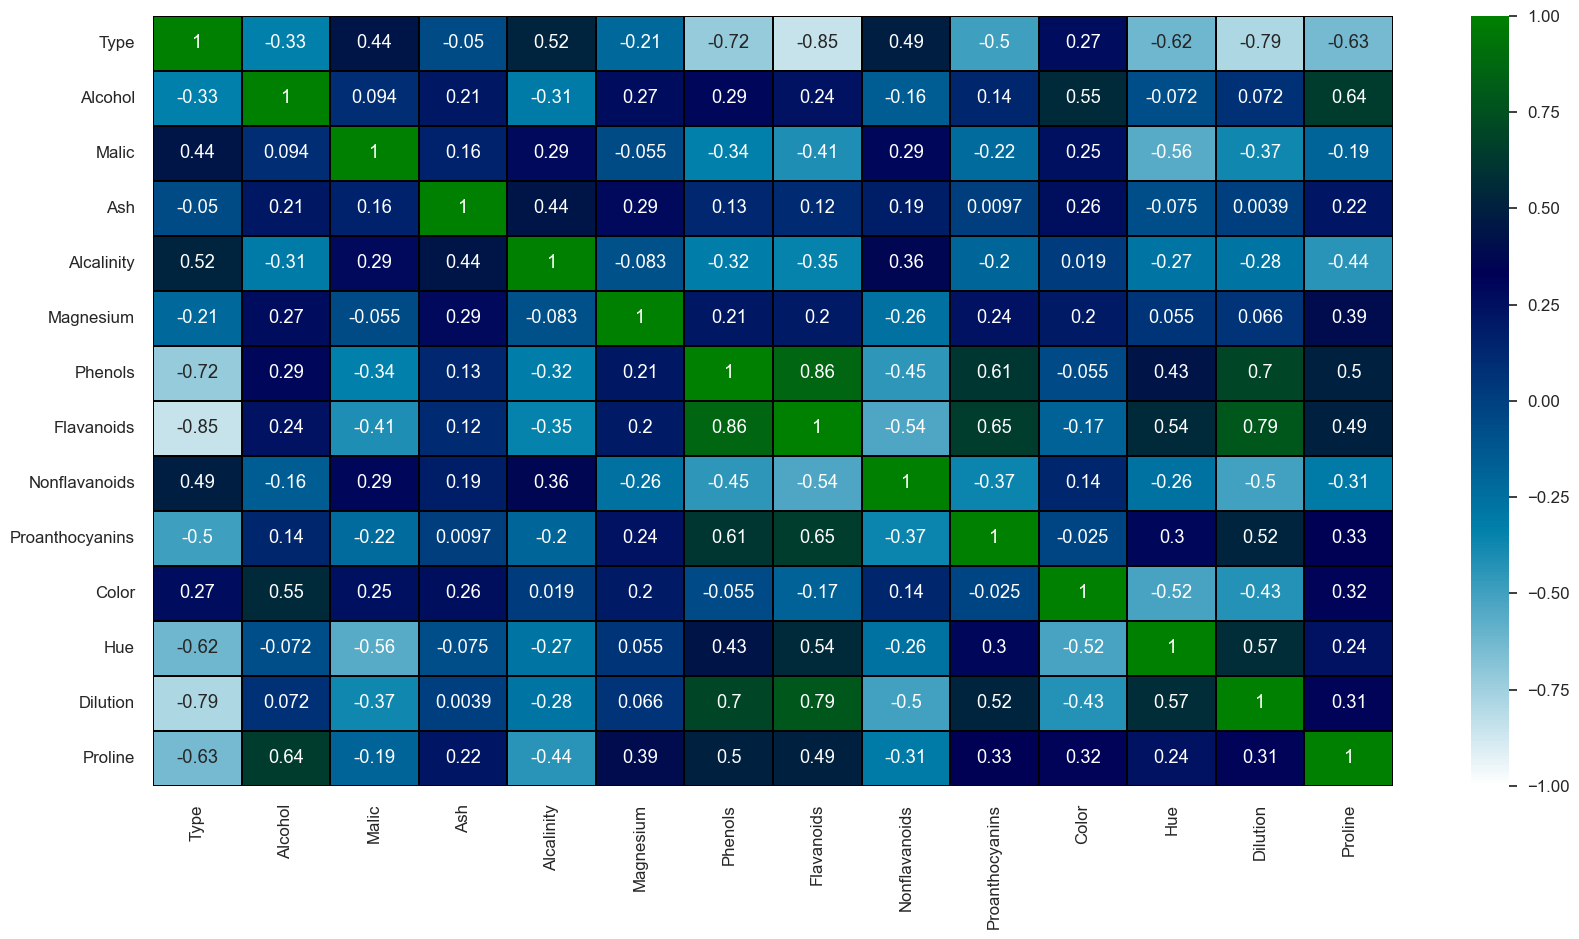

In [54]:
corr = df.corr()
top_features = corr.index
plt.figure(figsize=(20,10))
sns.heatmap(df[top_features].corr(),annot = True,linecolor='black',cbar='blue',linewidths=0.2,cmap='ocean_r',vmax=1,vmin=-1)

In [55]:
df[df.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [56]:
df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [57]:
df.shape

(178, 14)

<AxesSubplot:>

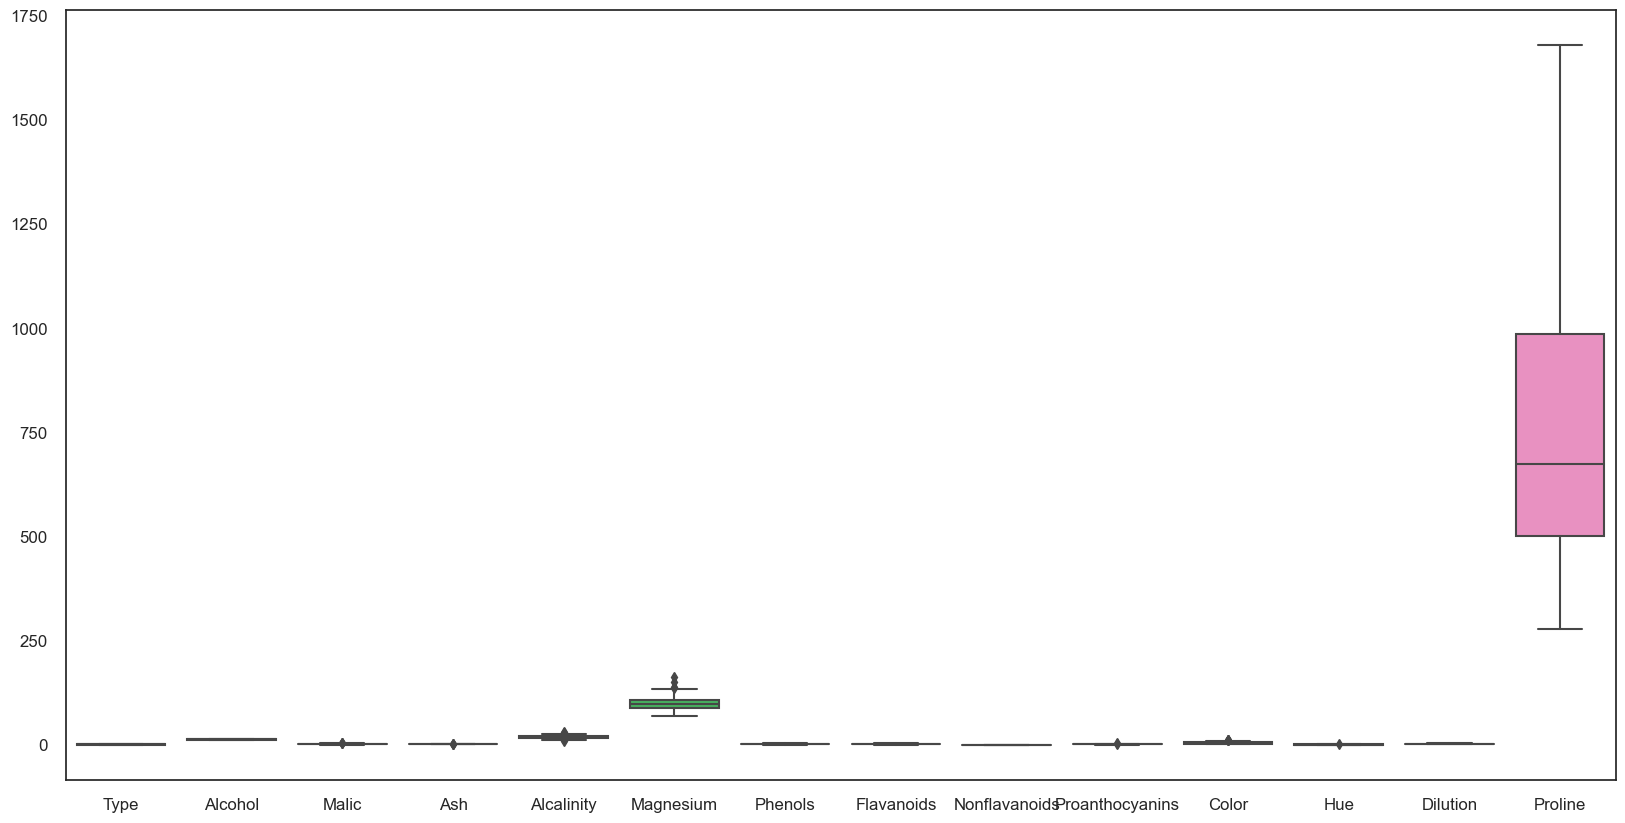

In [58]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

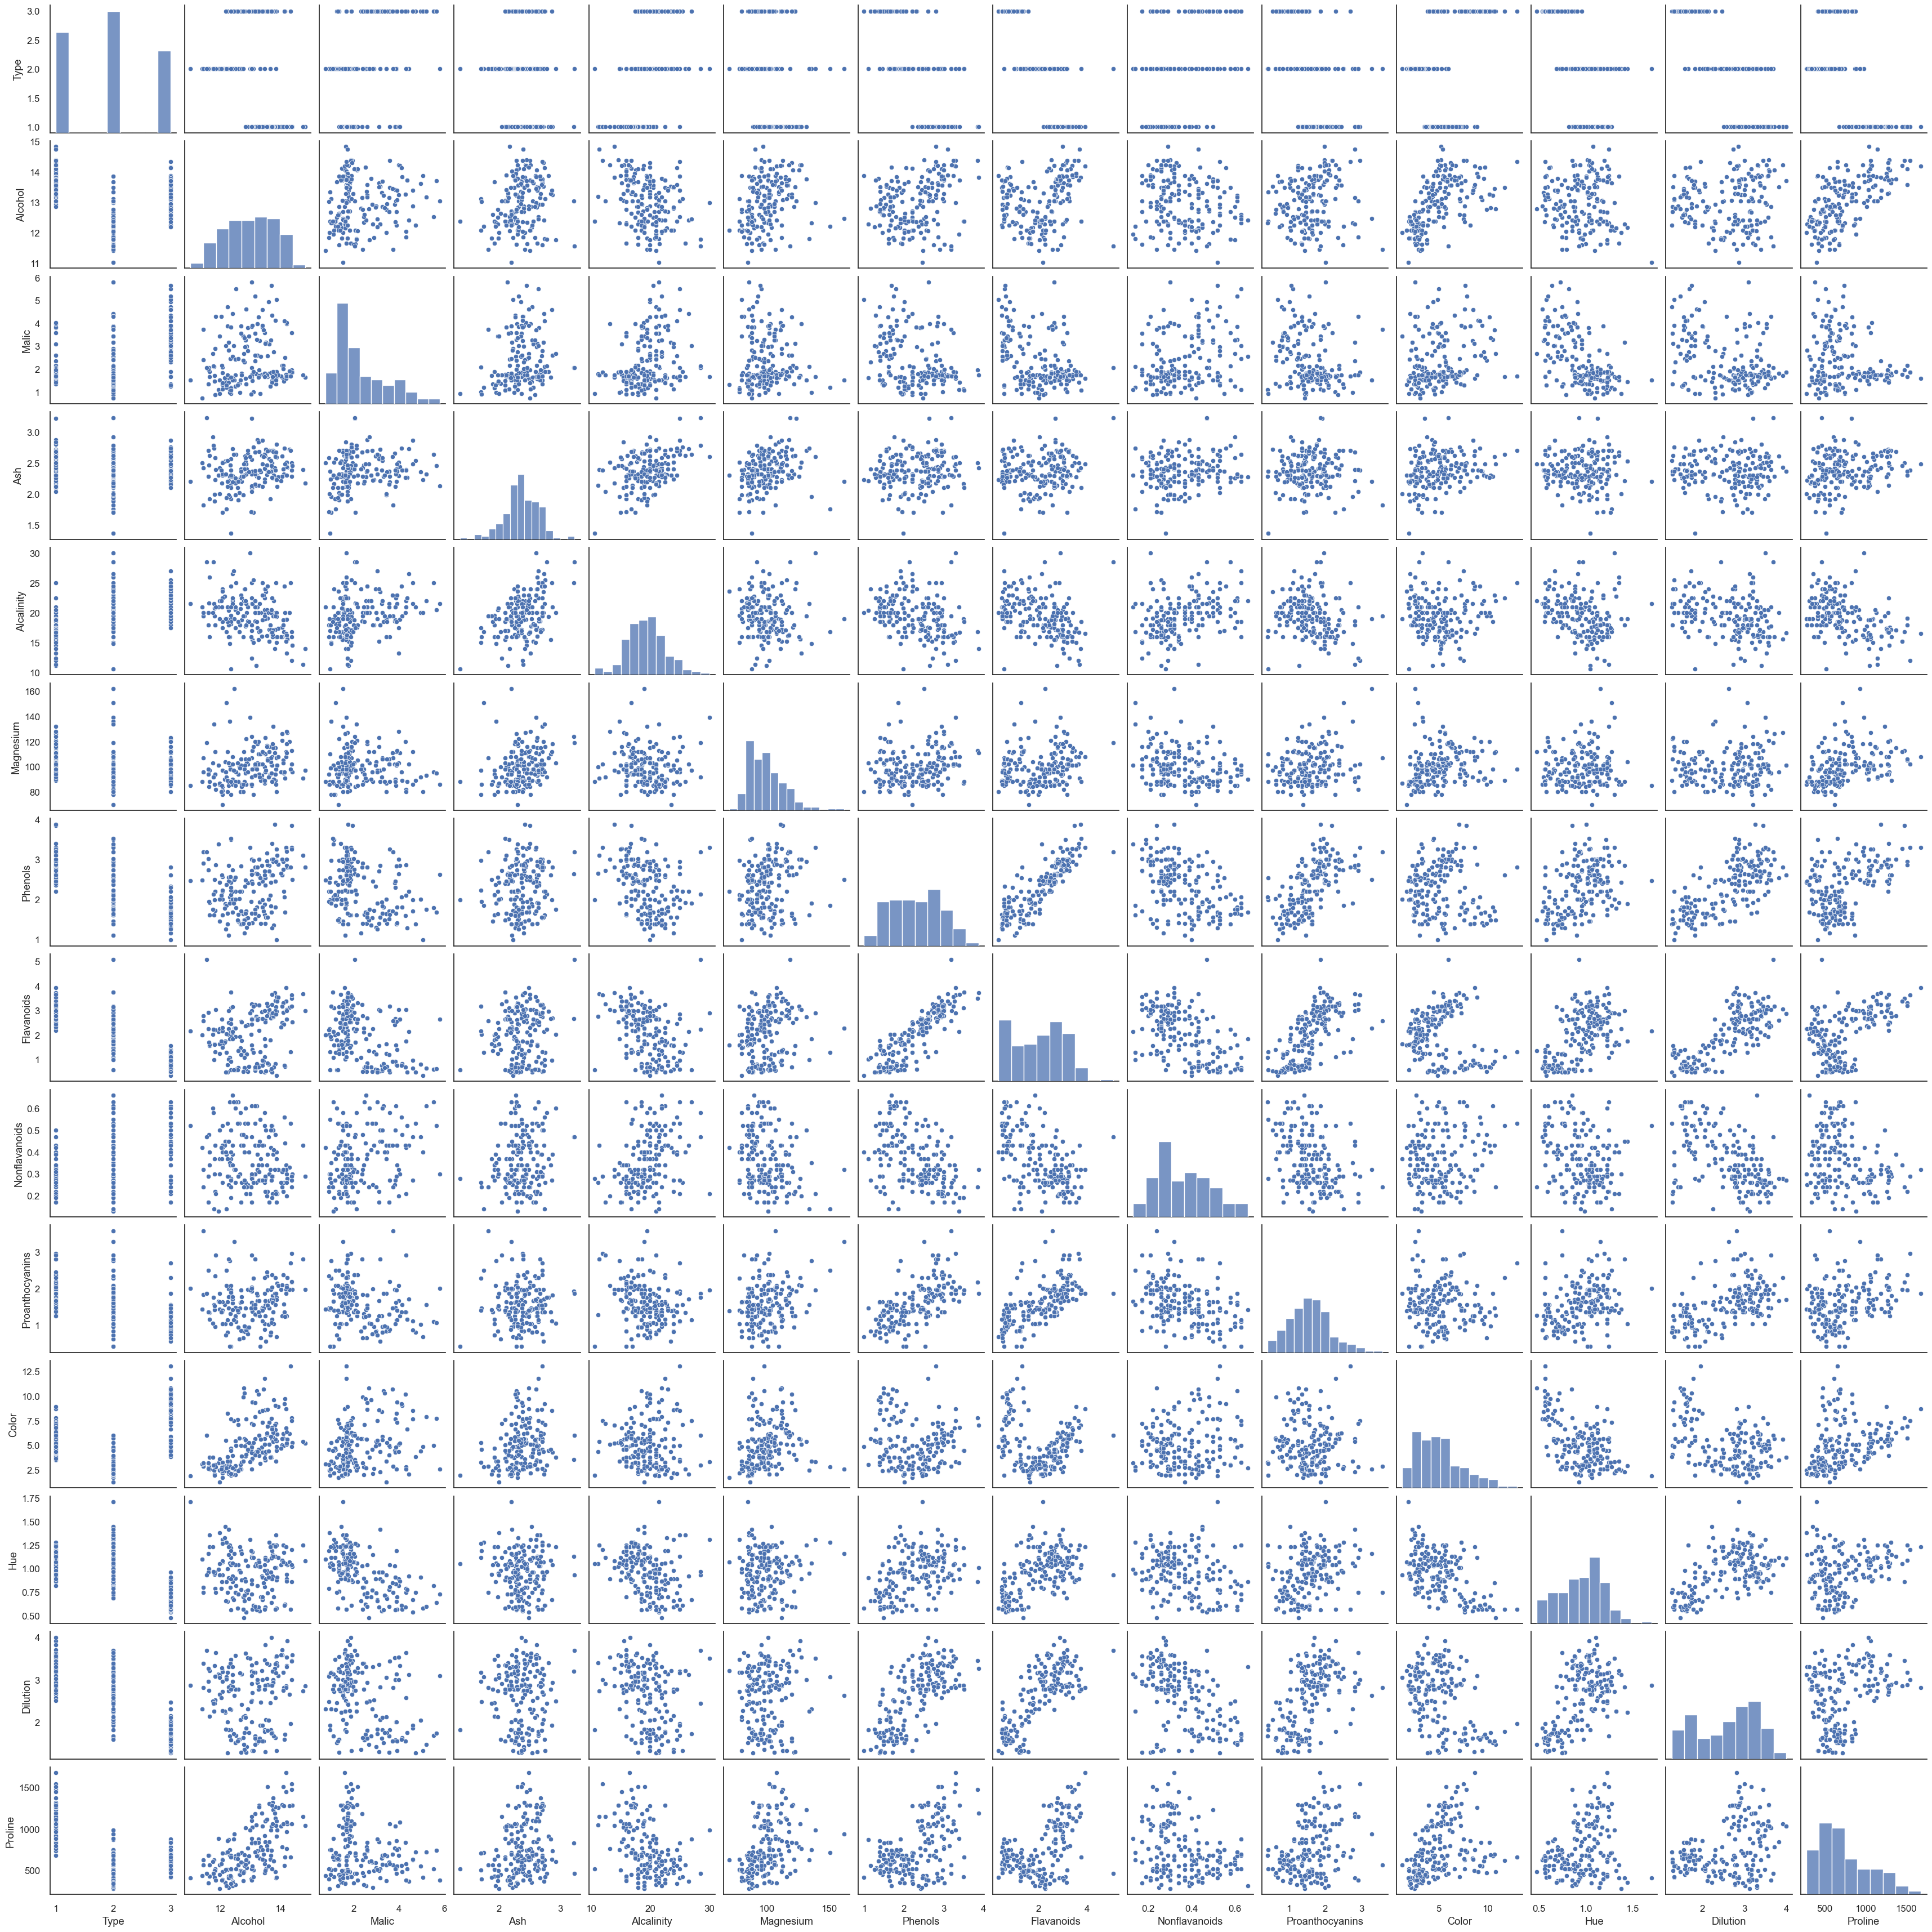

In [59]:
sns.pairplot(df)

<Figure size 2000x1000 with 0 Axes>

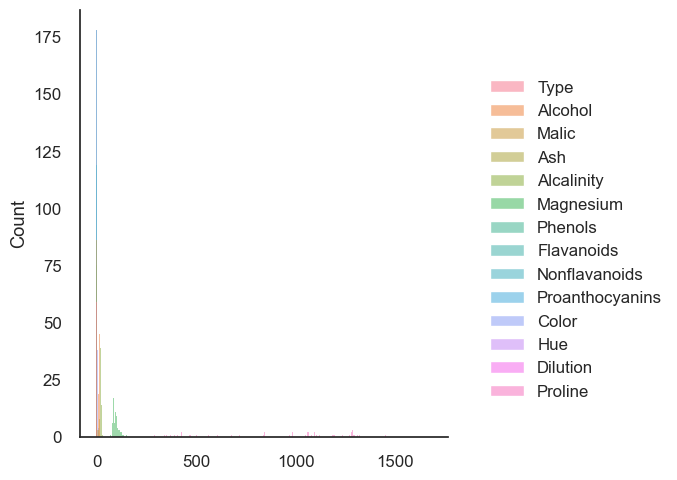

In [60]:
plt.figure(figsize=(20,10))
sns.displot(df)
plt.show()

Type


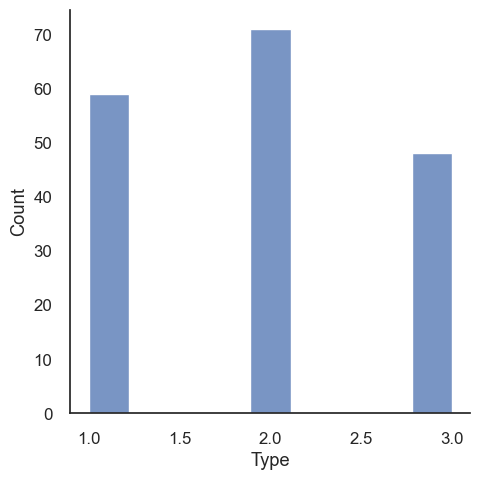

<Figure size 2000x1000 with 0 Axes>

Alcohol


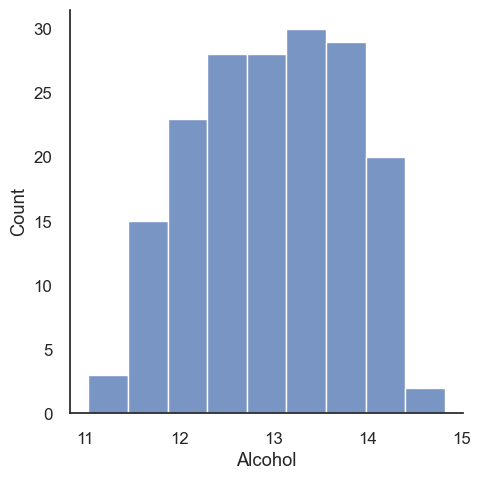

<Figure size 2000x1000 with 0 Axes>

Malic


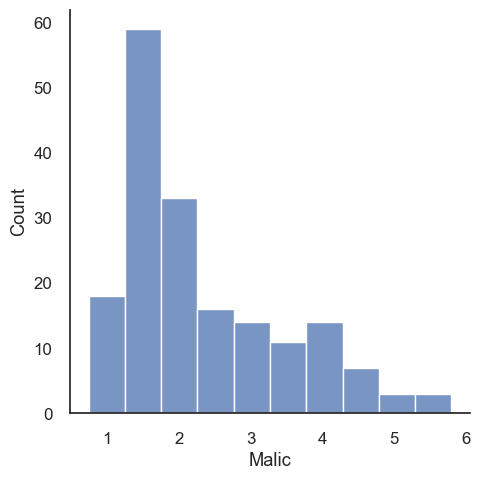

<Figure size 2000x1000 with 0 Axes>

Ash


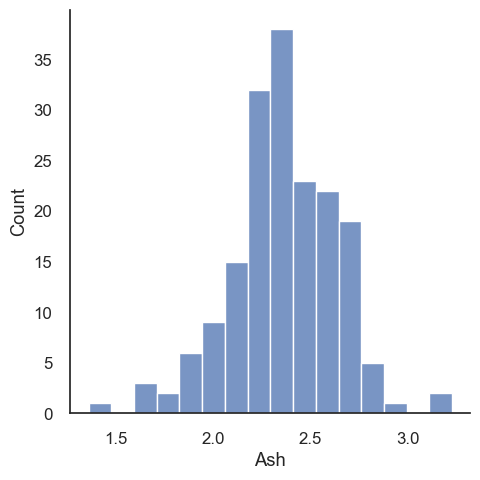

<Figure size 2000x1000 with 0 Axes>

Alcalinity


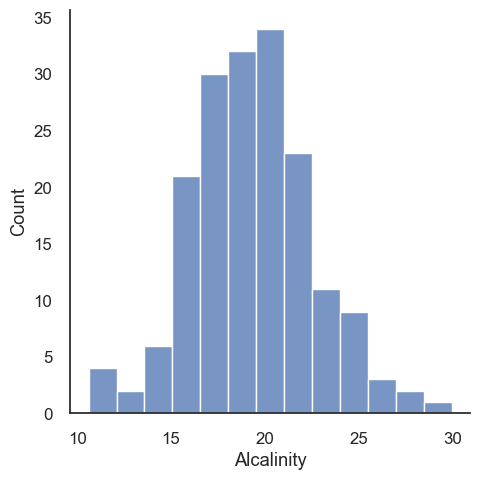

<Figure size 2000x1000 with 0 Axes>

Magnesium


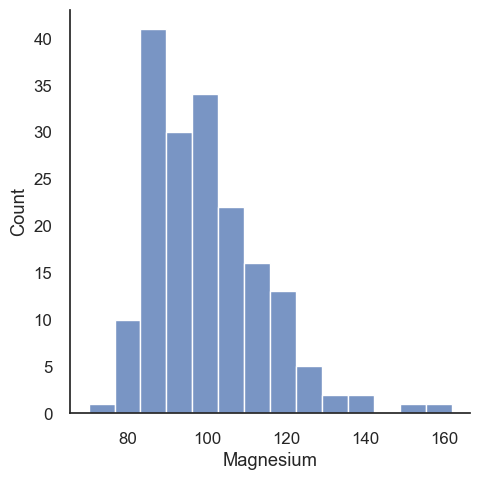

<Figure size 2000x1000 with 0 Axes>

Phenols


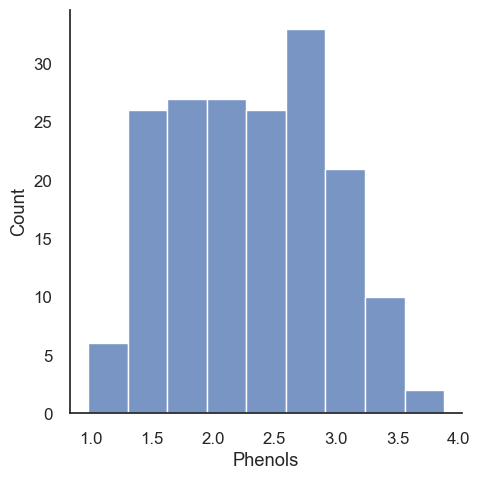

<Figure size 2000x1000 with 0 Axes>

Flavanoids


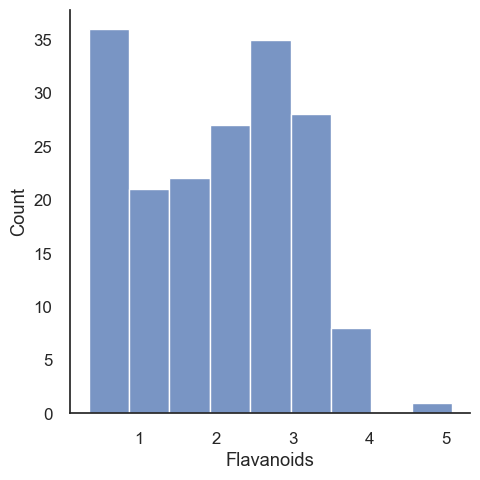

<Figure size 2000x1000 with 0 Axes>

Nonflavanoids


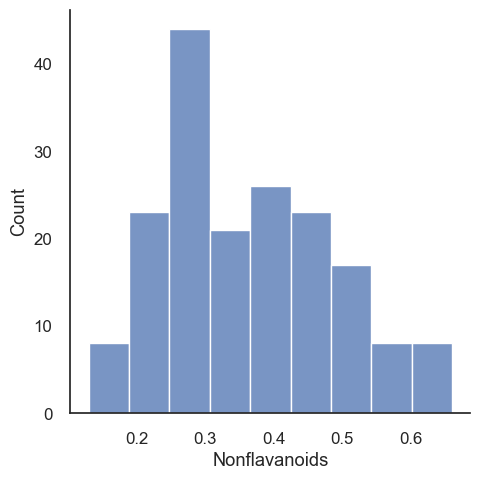

<Figure size 2000x1000 with 0 Axes>

Proanthocyanins


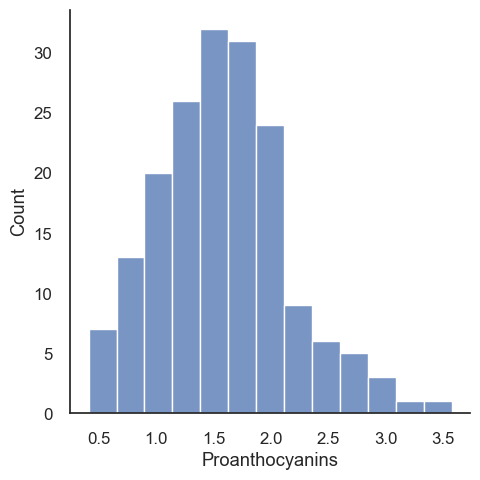

<Figure size 2000x1000 with 0 Axes>

Color


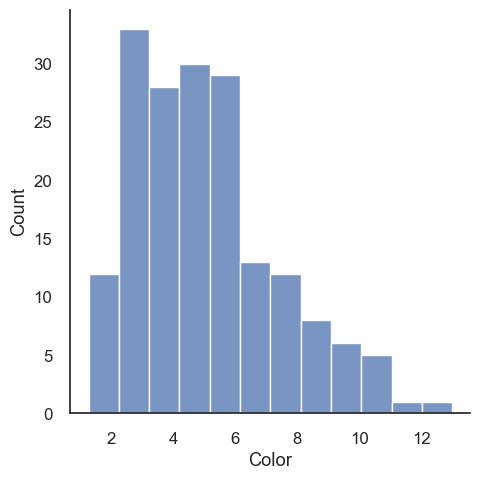

<Figure size 2000x1000 with 0 Axes>

Hue


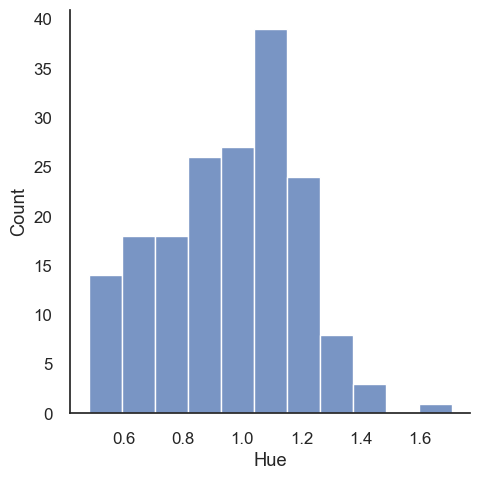

<Figure size 2000x1000 with 0 Axes>

Dilution


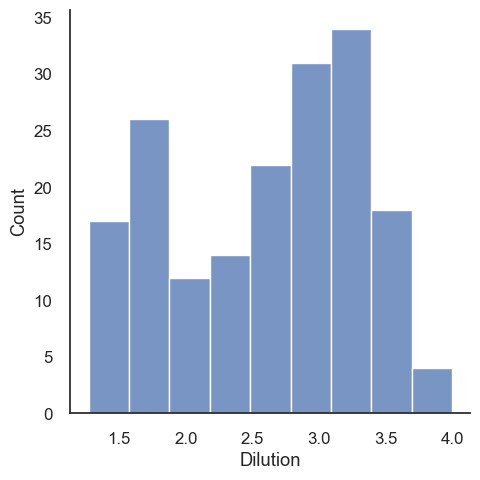

<Figure size 2000x1000 with 0 Axes>

Proline


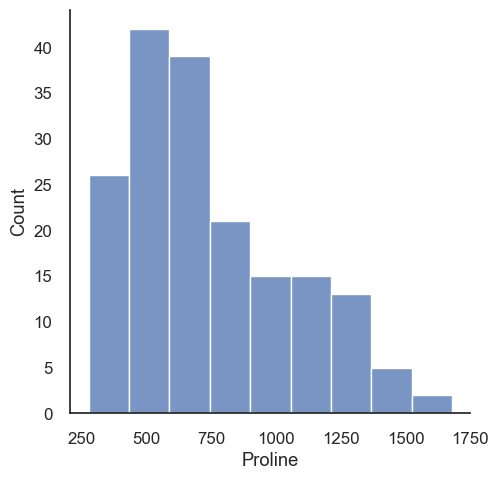

<Figure size 2000x1000 with 0 Axes>

In [61]:
for n in df.columns:
    print(n)
    sns.displot(df[n])
    plt.figure(figsize=(20,10))
    plt.show()

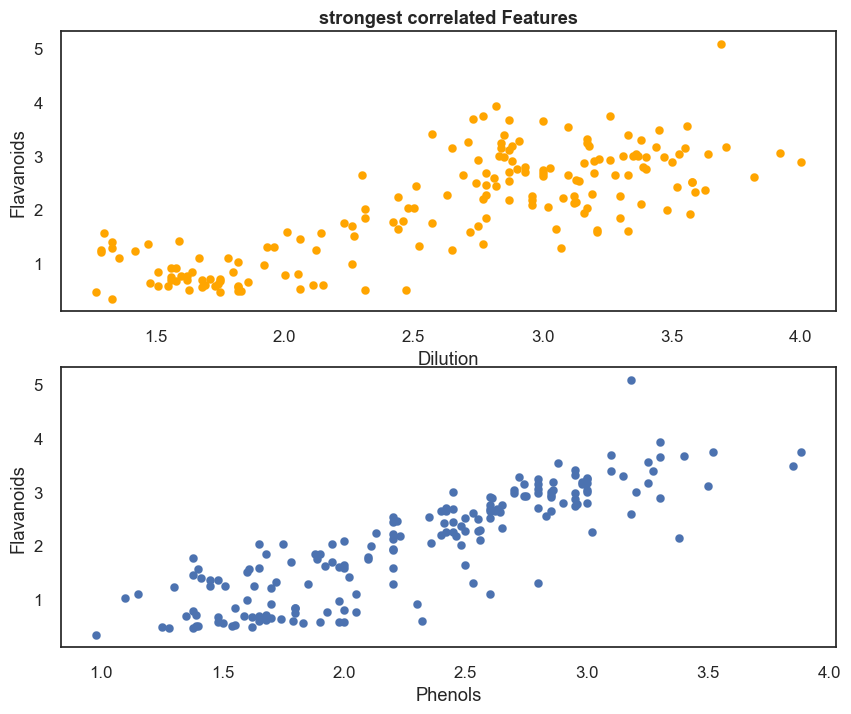

In [62]:
sns.set(style = 'white',rc = {'figure.figsize':(10,8)},font_scale=1.1)
plt.subplot(211)
plt.scatter(x=df['Dilution'],y=df['Flavanoids'],color='orange',lw=0.1)
plt.xlabel('Dilution')
plt.ylabel('Flavanoids')
plt.title('strongest correlated Features',fontweight='bold')
plt.subplot(212)
plt.scatter(x=df['Phenols'],y=df['Flavanoids'],lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')

plt.show()

# PCA Manually using Eigen Vector and values 

In [63]:
x=df.iloc[:,1:14]
x=x-x.mean(axis=0) # Standardaized

In [64]:
x

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.229382,-0.626348,0.063483,-3.894944,27.258427,0.504888,1.03073,-0.081854,0.699101,0.58191,0.082551,1.308315,318.106742
1,0.199382,-0.556348,-0.226517,-8.294944,0.258427,0.354888,0.73073,-0.101854,-0.310899,-0.67809,0.092551,0.788315,303.106742
2,0.159382,0.023652,0.303483,-0.894944,1.258427,0.504888,1.21073,-0.061854,1.219101,0.62191,0.072551,0.558315,438.106742
3,1.369382,-0.386348,0.133483,-2.694944,13.258427,1.554888,1.46073,-0.121854,0.589101,2.74191,-0.097449,0.838315,733.106742
4,0.239382,0.253652,0.503483,1.505056,18.258427,0.504888,0.66073,0.028146,0.229101,-0.73809,0.082551,0.318315,-11.893258
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.709382,3.313652,0.083483,1.005056,-4.741573,-0.615112,-1.41927,0.158146,-0.530899,2.64191,-0.317449,-0.871685,-6.893258
174,0.399382,1.573652,0.113483,3.505056,2.258427,-0.495112,-1.27927,0.068146,-0.180899,2.24191,-0.257449,-1.051685,3.106742
175,0.269382,1.943652,-0.106517,0.505056,20.258427,-0.705112,-1.33927,0.068146,-0.240899,5.14191,-0.367449,-1.051685,88.106742
176,0.169382,0.253652,0.003483,0.505056,20.258427,-0.645112,-1.34927,0.168146,-0.130899,4.24191,-0.357449,-0.991685,93.106742


In [65]:
y=np.dot(x.T,x)

In [66]:
val,vec=np.linalg.eigh(y) #It will give both eigen values and eigen vectors

In [67]:
val

array([1.45205546e+00, 3.72980881e+00, 6.65094826e+00, 1.26913608e+01,
       1.98411274e+01, 2.67944841e+01, 4.93783136e+01, 1.48868305e+02,
       2.17505605e+02, 8.83438614e+02, 1.67054613e+03, 3.05387422e+04,
       1.75587167e+07])

In [68]:
vec

array([[-8.02924535e-03, -1.56514071e-02, -1.49715080e-02,
        -2.24499994e-03,  8.66006124e-02, -2.84820658e-01,
        -9.23280337e-01,  1.94120104e-01, -2.03369773e-02,
         1.41446778e-01, -1.68738094e-02, -1.20340617e-03,
         1.65926472e-03],
       [ 1.10903923e-02,  6.72955455e-02, -2.31876506e-02,
        -1.85093501e-02,  1.56621385e-02,  6.46744678e-02,
         1.50109941e-01,  7.42472963e-01,  6.12883454e-01,
         1.60389543e-01, -1.22003373e-01, -2.15498184e-03,
        -6.81015556e-04],
       [ 1.73685673e-01, -1.32063034e-01,  9.54010643e-01,
        -8.67996529e-02,  7.36498524e-02,  1.49339532e-01,
        -4.50095494e-02,  4.17529118e-02, -2.01755752e-02,
        -9.77280992e-03, -5.19874304e-02, -4.59369254e-03,
         1.94905742e-04],
       [-1.93956297e-03,  5.39380582e-03, -5.28216953e-02,
         3.55402799e-03,  2.04457786e-03, -1.51539118e-02,
        -3.15265835e-02, -2.40653026e-02, -6.43523403e-02,
        -3.30965260e-01, -9.38593003e

In [69]:
new_features=np.dot(x,vec)

In [70]:
new_features

array([[-8.02644337e-02, -3.85475626e-02,  8.87340044e-02, ...,
         3.13073470e+00, -2.14921307e+01,  3.18562979e+02],
       [-1.35927465e-02, -5.71915771e-02,  3.97781862e-02, ...,
         6.82283550e+00,  5.36471768e+00,  3.03097420e+02],
       [ 3.54081623e-02, -4.87978751e-02,  2.37770027e-01, ...,
        -1.11322298e+00,  6.53730945e+00,  4.38061133e+02],
       ...,
       [-3.61748954e-02,  9.60485021e-02, -2.23049341e-01, ...,
        -2.23757651e+00, -1.87762846e+01,  8.84580737e+01],
       [-1.32759078e-01, -5.20893107e-02, -3.04078323e-02, ...,
        -1.78839152e+00, -1.86708191e+01,  9.34562419e+01],
       [-2.69369989e-02,  3.19201764e-02,  1.60725068e-01, ...,
        -5.63050984e+00,  2.13330803e-01, -1.86943190e+02]])

In [71]:
model=LogisticRegression()
features=new_features[:,1:14] 
target=df["Type"]
model.fit(features,target)

LogisticRegression()

In [72]:
pred=model.predict(features)

In [73]:
print(classification_report(target,pred))

              precision    recall  f1-score   support

           1       1.00      0.98      0.99        59
           2       0.99      0.99      0.99        71
           3       0.98      1.00      0.99        48

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178



In [74]:
 # We can clearly see that our data is in linear Form because logistic regression is working well.

# Model Building

In [75]:
x_train,x_test,y_train,y_test=train_test_split(new_features[:,1:44],df["Type"],test_size=0.2,random_state=1)

In [76]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [77]:
pred=model.predict(x_test)

In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.92      0.92      0.92        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



# PCA 

In [79]:
#Feature scaling for all of our features 
# std = StandardScaler()
# df_scaled = std.fit_transform(df)

In [80]:
pca=PCA()
x=df.iloc[:,1:14]
features=pca.fit_transform(x)
target=df["Type"]

In [81]:
df=pd.DataFrame(features)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,318.562979,21.492131,3.130735,-0.250114,0.677078,0.568081,-0.619642,-0.199555,0.701280,-0.095008,0.088734,-0.038548,0.080264
1,303.097420,-5.364718,6.822835,-0.864035,-0.486096,0.014340,0.108865,0.604714,0.286717,-0.045782,0.039778,-0.057192,0.013593
2,438.061133,-6.537309,-1.113223,0.912411,0.380651,0.672404,0.785819,-0.500886,0.024547,-0.208960,0.237770,-0.048798,-0.035408
3,733.240139,0.192729,-0.917257,-0.541251,0.858662,0.599122,0.018770,0.190428,0.054277,0.531684,-0.096044,-0.166353,0.016344
4,-11.571428,18.489995,-0.554422,1.360896,0.276442,0.768884,-0.309976,0.119091,-0.195843,0.061771,0.316466,-0.007118,0.015278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-6.980211,-4.541137,-2.474707,-3.155920,-2.348927,1.439001,-0.026425,0.043705,0.040167,0.087377,0.016509,0.098355,0.027251
174,3.131605,2.335191,-4.309931,-1.562181,-1.168003,0.128679,0.003859,-0.303185,-0.159759,0.159510,-0.048916,0.012626,-0.042645
175,88.458074,18.776285,-2.237577,-4.820708,-1.057336,0.215000,0.648489,0.068966,0.273675,-0.045336,-0.223049,0.096049,0.036175
176,93.456242,18.670819,-1.788392,-3.709352,-0.276956,-1.009229,0.414948,-0.145647,0.254468,0.059211,-0.030408,-0.052089,0.132759


In [82]:
np.round(pca.explained_variance_,4)

array([9.92017895e+04, 1.72535300e+02, 9.43810000e+00, 4.99120000e+00,
       1.22880000e+00, 8.41100000e-01, 2.79000000e-01, 1.51400000e-01,
       1.12100000e-01, 7.17000000e-02, 3.76000000e-02, 2.11000000e-02,
       8.20000000e-03])

In [83]:
explained_variance_ratio=pca.explained_variance_ratio_

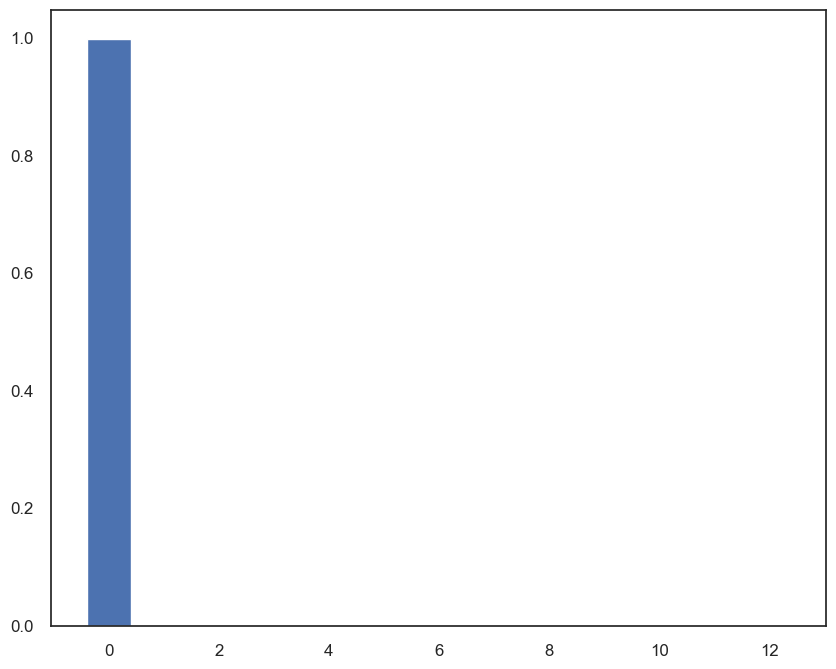

In [84]:
# Checking the importanceof feature
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio);

In [86]:
# We can see that first feature has almost the maximum data so we take first two features.

In [102]:
new_df=df.iloc[:,:3]
new_df=new_df.rename(columns={0:'pca1',1:'pca2',2:'pca3'})

In [103]:
new_df

,pca1,pca2,pca3
0,318.562979,21.492131,3.130735
1,303.097420,-5.364718,6.822835
2,438.061133,-6.537309,-1.113223
3,733.240139,0.192729,-0.917257
4,-11.571428,18.489995,-0.554422
...,...,...,...
173,-6.980211,-4.541137,-2.474707
174,3.131605,2.335191,-4.309931
175,88.458074,18.776285,-2.237577
176,93.456242,18.670819,-1.788392


In [104]:
scalar=MinMaxScaler()
scaled_data=scalar.fit_transform(new_df)

In [105]:
scaled_data=pd.DataFrame(scaled_data)
scaled_data

,0,1,2
0,0.561714,0.567757,0.640338
1,0.550684,0.256546,0.835149
2,0.646937,0.242958,0.416408
3,0.857452,0.320944,0.426748
4,0.326270,0.532969,0.445893
...,...,...,...
173,0.329544,0.266089,0.344570
174,0.336755,0.345770,0.247736
175,0.397608,0.536286,0.357082
176,0.401173,0.535064,0.380783


# Clustering

## Hierarchical Clustering

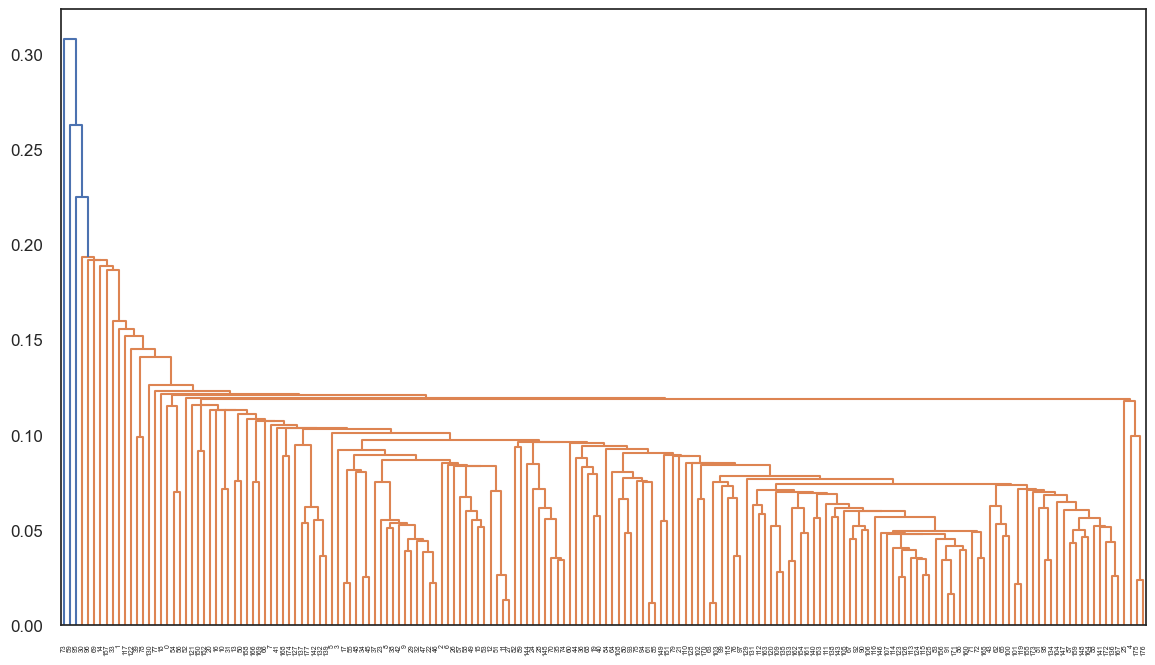

In [106]:
# Dendrogram
plt.figure(figsize=(14,8))
dendogram=sch.dendrogram(sch.linkage(scaled_data,method='single'))

In [107]:
# Silhoute Score
from sklearn.metrics import silhouette_score as sil

In [108]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]
for i in nc:
    hc=AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')
    y=hc.fit_predict(scaled_data)
    sc_score.append(sil(scaled_data,y))
print(sc_score)

[0.18530499981269288, 0.26216488784346215, 0.2685671293433004, 0.2668444216877551, 0.25544158273207324, 0.24325814341402352, 0.22356006110432838, 0.21641789366880715]


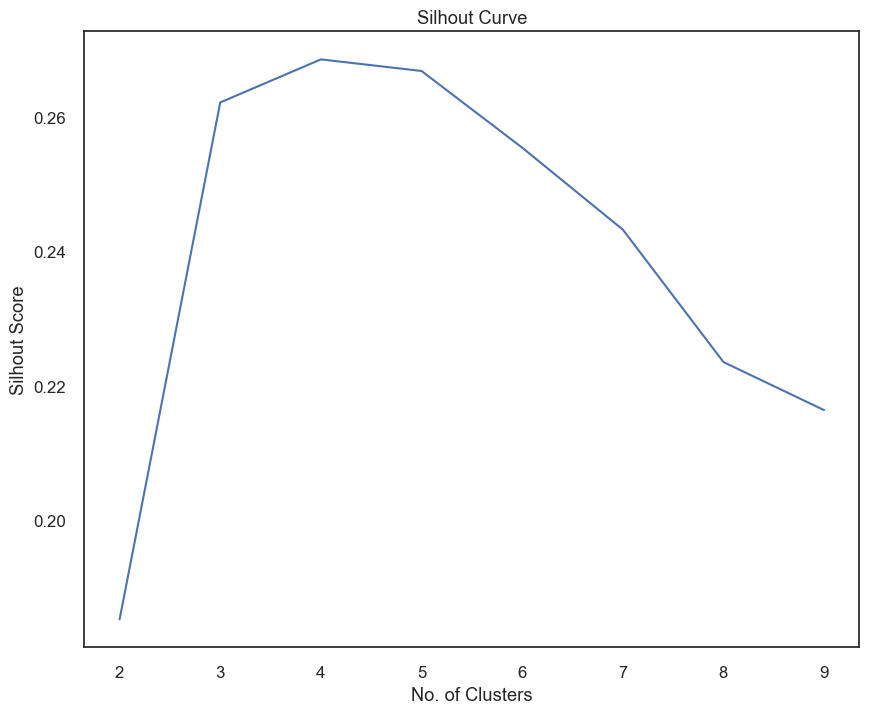

In [109]:
plt.plot(nc,sc_score)
plt.title('Silhout Curve')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhout Score')
plt.show()

In [110]:
# Best score is 3
hc=AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
y_hc=hc.fit_predict(scaled_data)
#scaled_data['y_hc']=y
scaled_data

,0,1,2
0,0.561714,0.567757,0.640338
1,0.550684,0.256546,0.835149
2,0.646937,0.242958,0.416408
3,0.857452,0.320944,0.426748
4,0.326270,0.532969,0.445893
...,...,...,...
173,0.329544,0.266089,0.344570
174,0.336755,0.345770,0.247736
175,0.397608,0.536286,0.357082
176,0.401173,0.535064,0.380783


In [114]:
scaled_data['y_hc']=y_hc
scaled_data

,0,1,2,y_hc
0,0.561714,0.567757,0.640338,0
1,0.550684,0.256546,0.835149,2
2,0.646937,0.242958,0.416408,2
3,0.857452,0.320944,0.426748,2
4,0.326270,0.532969,0.445893,1
...,...,...,...,...
173,0.329544,0.266089,0.344570,1
174,0.336755,0.345770,0.247736,1
175,0.397608,0.536286,0.357082,1
176,0.401173,0.535064,0.380783,1


In [113]:
print(scaled_data['y_hc'].value_counts())

0    71
1    67
2    40
Name: y_hc, dtype: int64


## K Means Clustering

In [115]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
score_elbow=[]
for i in nc:
    km = KMeans(n_clusters=i)
    y=km.fit_predict(scaled_data)
    sc_score.append(sil(scaled_data,y))
    score_elbow.append(km.inertia_) 
print(sc_score)
print(score_elbow)

[0.619097772842045, 0.7375737781126215, 0.6321160812093424, 0.47635271533855666, 0.3880299453010016, 0.3847794358715839, 0.3201085455928251, 0.33112100918554627]
[39.26148050474202, 9.112535035320889, 7.265062683380531, 6.209281790554961, 5.556889376115248, 4.961475071759645, 4.385111819932853, 4.009410699094642]


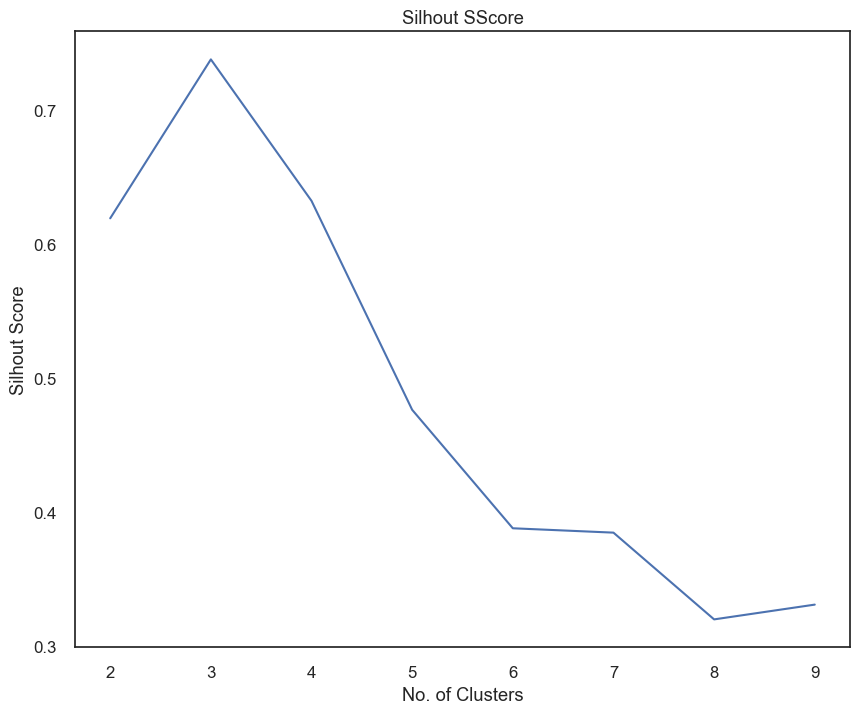

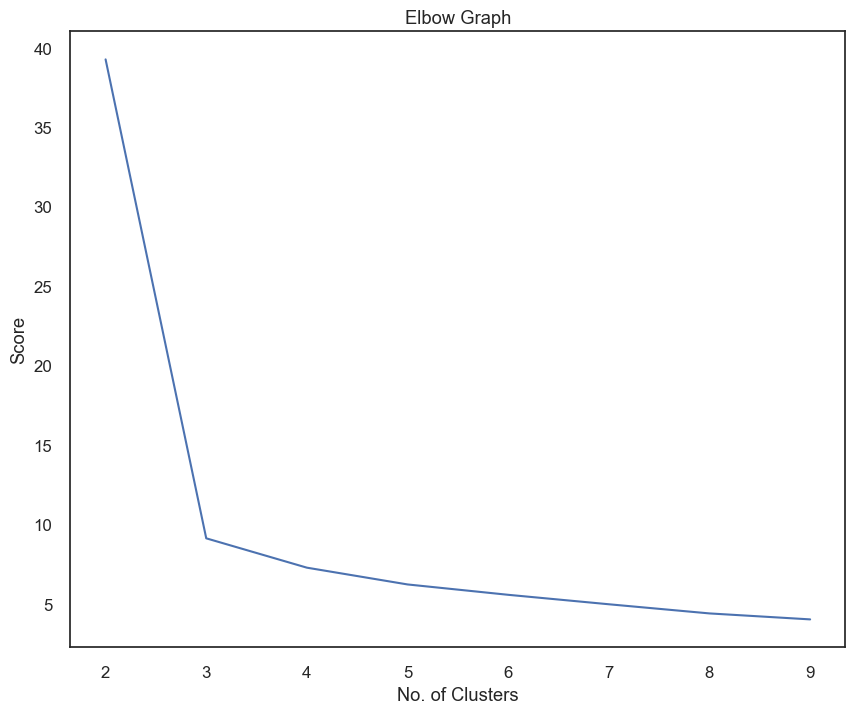

In [116]:
plt.plot(nc,sc_score)
plt.title("Silhout SScore")
plt.xlabel("No. of Clusters")
plt.ylabel("Silhout Score")
plt.show()

plt.plot(nc,score_elbow)
plt.title("Elbow Graph")
plt.xlabel("No. of Clusters")
plt.ylabel("Score")
plt.show()

In [117]:
km = KMeans(n_clusters=3)
y_km=km.fit_predict(scaled_data)

In [119]:
scaled_data['y_km']=y_km
scaled_data

,0,1,2,y_hc,y_km
0,0.561714,0.567757,0.640338,0,1
1,0.550684,0.256546,0.835149,2,0
2,0.646937,0.242958,0.416408,2,0
3,0.857452,0.320944,0.426748,2,0
4,0.326270,0.532969,0.445893,1,2
...,...,...,...,...,...
173,0.329544,0.266089,0.344570,1,2
174,0.336755,0.345770,0.247736,1,2
175,0.397608,0.536286,0.357082,1,2
176,0.401173,0.535064,0.380783,1,2


In [120]:
print(scaled_data['y_km'].value_counts())

1    71
2    67
0    40
Name: y_km, dtype: int64


## DBSCAN

In [123]:
dbscan=DBSCAN(eps=0.1,min_samples=2)
dbscan.fit(scaled_data)
y_db=dbscan.labels_
y_db

array([-1, -1,  0,  0,  1, -1,  0, -1,  0,  0,  2,  0,  0,  3, -1,  0, -1,
        4, -1,  5, -1,  5,  0,  0,  6, -1,  0,  0,  6,  0, -1,  2,  0, -1,
        7,  6,  5,  0,  0,  8,  5, -1,  0,  5,  5,  7,  0,  0,  7,  0,  3,
        0, -1,  0,  9,  4,  9,  0,  0, -1,  5,  5,  5,  5,  5,  5, -1,  5,
        5, -1,  6,  6,  6, -1,  6,  5,  5, -1,  8, 10,  5,  5,  6,  6,  5,
        5,  6,  6,  6,  6,  5,  6,  5,  5,  5, -1, -1,  5,  5,  5,  5,  5,
        5,  5,  6,  5,  5,  6,  5,  5,  5,  5,  5,  5,  5,  5,  5, -1,  5,
        5,  5, -1, -1,  5,  5,  5,  5, 11,  6,  6, -1,  5, 11, 10,  5,  5,
        6, 11,  6, 11,  5,  6, 11,  6,  6,  6,  5,  6,  6, 10, 12, 10, 12,
        5,  5,  6,  6, -1, -1,  6,  6,  5, 10,  5,  6,  6, 13,  6, 14, 13,
        5,  6,  6,  6, 14,  1,  1, 11], dtype=int64)

In [124]:
scaled_data['y_db']=y_db
scaled_data

,0,1,2,y_hc,y_km,y_db
0,0.561714,0.567757,0.640338,0,1,-1
1,0.550684,0.256546,0.835149,2,0,-1
2,0.646937,0.242958,0.416408,2,0,0
3,0.857452,0.320944,0.426748,2,0,0
4,0.326270,0.532969,0.445893,1,2,1
...,...,...,...,...,...,...
173,0.329544,0.266089,0.344570,1,2,6
174,0.336755,0.345770,0.247736,1,2,14
175,0.397608,0.536286,0.357082,1,2,1
176,0.401173,0.535064,0.380783,1,2,1


In [125]:
print(scaled_data['y_db'].value_counts())

 5     59
 6     36
-1     26
 0     24
 11     6
 10     5
 1      3
 7      3
 2      2
 3      2
 4      2
 8      2
 9      2
 12     2
 13     2
 14     2
Name: y_db, dtype: int64


In [126]:
# So for Hierarchical we are getting 3 clusters,for KMeans we are getting 3 clusters and for DBSCAN we are getting 11 clusters.